In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.io.fits as fits
from statsmodels.graphics.correlation import plot_corr
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

##### Astropy https://docs.astropy.org/en/stable/io/fits/index.html is a package provides access to FITS files. FITS (Flexible Image Transport System) is a portable file standard widely used in the astronomy community to store images and tables. This subpackage was originally developed as PyFITS.

In [21]:
# Opening a FITS File
mice= fits.open('MICE_all.fits')
mice

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000024353C188E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024353C18E20>]

##### The HDUList has a useful method HDUList.info(), which summarizes the content of the opened FITS file. Each element of an HDUList is an HDU object with .header and .data attributes, which can be used to access the header and data portions of the HDU.

In [22]:
mice[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                   72 / width of table in bytes                        
NAXIS2  =               202046 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   14 / number of columns                              
EXTNAME = '/net/home/fohlen13/jlvdb/LegaZy/DATA/MICE2/CHUNKS/001/MICE2_all.fits'
TTYPE1  = 'ra_gal_mag'         / label for column 1                             
TFORM1  = 'D       '           / format for column 1                            
TTYPE2  = 'dec_gal_mag'        / label for column 2                             
TFORM2  = 'D       '        

#### Making the fits file an object of Pandas dataframe

In [26]:
from astropy.table import Table
dat = Table.read('MICE_all.fits', format='fits')
df = dat.to_pandas()

#### Making the Converted fits file an instance of the CSV object, i.e, saving the DataFrame to csv

In [27]:
df.to_csv('MICE_all.csv', index= False)

### Reading in the saved CSV

In [3]:
df1= pd.read_csv('MICE_all.csv')
df1

,ra_gal_mag,dec_gal_mag,z_cgal_v,Z_B,sdss_u_obs_mag,sdss_g_obs_mag,sdss_r_obs_mag,sdss_i_obs_mag,sdss_z_obs_mag,des_asahi_full_y_obs_mag,vhs_j_obs_mag,vhs_h_obs_mag,vhs_ks_obs_mag,recal_weight
0,43.928490,16.469467,0.13224,0.427,22.445995,20.441048,19.201607,18.737179,18.327200,18.090225,17.514538,17.129253,17.087795,0.000
1,40.720612,16.139664,0.16692,0.247,19.491472,18.407993,17.582033,17.253082,16.984737,16.818480,16.392279,16.175877,16.069153,0.000
2,43.448330,10.640027,0.10892,0.127,20.323418,18.652018,17.700796,17.336498,17.032707,16.883375,16.632895,16.512909,16.592436,0.000
3,41.450729,11.512150,0.25054,0.407,22.834728,21.467422,20.067090,19.630856,19.229143,18.968946,18.462963,18.167190,18.000439,15.563
4,41.894215,16.388594,0.43852,0.477,21.390217,21.136885,20.214273,19.945145,19.872433,19.737900,19.528017,19.431437,19.467810,15.563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202041,39.752037,13.182721,0.28955,0.427,19.863651,19.578197,19.140112,19.019857,18.904125,18.839277,18.660040,18.582240,18.540144,0.000
202042,37.437702,17.201658,0.52582,0.447,21.355782,21.241316,20.475494,20.198069,20.128103,20.012012,19.921143,19.689392,19.797403,15.563
202043,39.523041,12.832017,0.19875,0.217,21.354929,20.566870,19.902680,19.705547,19.519814,19.391071,19.227459,19.197918,19.024998,15.563
202044,40.277309,19.343592,0.33310,0.317,22.780977,21.450357,19.881948,19.322104,18.983400,18.814150,18.335500,18.116180,17.867254,15.563


In [4]:
# Applying the KiDS magnitude limit of r<19.87 to the data to select bright galaxy sample
condn = df1['sdss_r_obs_mag'] <19.87
df= df1.loc[condn]

In [5]:
# Printing the 1st 5 columns
df.head()

,ra_gal_mag,dec_gal_mag,z_cgal_v,Z_B,sdss_u_obs_mag,sdss_g_obs_mag,sdss_r_obs_mag,sdss_i_obs_mag,sdss_z_obs_mag,des_asahi_full_y_obs_mag,vhs_j_obs_mag,vhs_h_obs_mag,vhs_ks_obs_mag,recal_weight
0,43.928490,16.469467,0.13224,0.427,22.445995,20.441048,19.201607,18.737179,18.327200,18.090225,17.514538,17.129253,17.087795,0.0
1,40.720612,16.139664,0.16692,0.247,19.491472,18.407993,17.582033,17.253082,16.984737,16.818480,16.392279,16.175877,16.069153,0.0
2,43.448330,10.640027,0.10892,0.127,20.323418,18.652018,17.700796,17.336498,17.032707,16.883375,16.632895,16.512909,16.592436,0.0
7,43.296913,16.146000,0.18193,0.207,20.448687,19.551940,18.836819,18.545937,18.357462,18.248070,17.954687,17.851060,17.745190,0.0
8,42.485569,18.197239,0.20820,0.187,20.952429,20.032139,19.309181,19.020874,18.802732,18.632198,18.292557,18.188116,18.052607,0.0


## Exploratory Data Analysis EDA

In [16]:
df.describe()

,ra_gal_mag,dec_gal_mag,z_cgal_v,Z_B,sdss_u_obs_mag,sdss_g_obs_mag,sdss_r_obs_mag,sdss_i_obs_mag,sdss_z_obs_mag,des_asahi_full_y_obs_mag,vhs_j_obs_mag,vhs_h_obs_mag,vhs_ks_obs_mag,recal_weight
count,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000,96063.000000
mean,40.284712,14.844143,0.239972,0.281470,21.326291,20.078172,19.108240,18.747399,18.490565,18.346083,18.019303,17.838719,17.722091,5.580342
std,2.857478,2.898202,0.102370,0.140432,3.136208,0.820759,0.700662,0.720738,0.760942,0.790054,0.855726,0.913416,0.941527,7.461121
min,35.000076,10.000208,0.070660,0.067000,16.743607,15.522861,14.553642,14.170820,13.804661,13.563514,13.146044,12.818968,12.869907,0.000000
25%,37.857623,12.314355,0.155280,0.187000,20.540056,19.647160,18.790451,18.400601,18.116934,17.952141,17.565618,17.333471,17.168849,0.000000
50%,40.414715,14.723013,0.226780,0.257000,21.146180,20.211466,19.315414,18.929668,18.649284,18.493061,18.117360,17.915940,17.769910,0.000000
75%,42.752554,17.351233,0.307670,0.357000,21.905909,20.656134,19.635910,19.262335,19.019666,18.890546,18.604309,18.459624,18.359356,15.563000
max,44.999897,19.999901,0.830210,1.317000,99.000000,22.022160,19.869982,19.959028,20.026460,20.112629,20.127172,20.336233,20.657806,15.563000


In [18]:
abs(np.mean(df['z_cgal_v'])-np.mean(df['Z_B']))

0.04149856094438023

In [320]:
# Printing the dimensions of data
df.shape

(96063, 14)

In [186]:
# Viewing the column heading
df.columns

Index(['ra_gal_mag', 'dec_gal_mag', 'z_cgal_v', 'Z_B', 'sdss_u_obs_mag',
       'sdss_g_obs_mag', 'sdss_r_obs_mag', 'sdss_i_obs_mag', 'sdss_z_obs_mag',
       'des_asahi_full_y_obs_mag', 'vhs_j_obs_mag', 'vhs_h_obs_mag',
       'vhs_ks_obs_mag', 'recal_weight'],
      dtype='object')

In [187]:
df.dtypes

ra_gal_mag                  float64
dec_gal_mag                 float64
z_cgal_v                    float64
Z_B                         float64
sdss_u_obs_mag              float64
sdss_g_obs_mag              float64
sdss_r_obs_mag              float64
sdss_i_obs_mag              float64
sdss_z_obs_mag              float64
des_asahi_full_y_obs_mag    float64
vhs_j_obs_mag               float64
vhs_h_obs_mag               float64
vhs_ks_obs_mag              float64
recal_weight                float64
dtype: object

In [188]:
# Identifying the unique number of values in the dataset
df.nunique()

ra_gal_mag                  94311
dec_gal_mag                 95448
z_cgal_v                    34689
Z_B                            97
sdss_u_obs_mag              93448
sdss_g_obs_mag              92634
sdss_r_obs_mag              90714
sdss_i_obs_mag              91852
sdss_z_obs_mag              92323
des_asahi_full_y_obs_mag    92579
vhs_j_obs_mag               92874
vhs_h_obs_mag               93167
vhs_ks_obs_mag              93347
recal_weight                  331
dtype: int64

In [189]:
#Getting general information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96063 entries, 0 to 202041
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ra_gal_mag                96063 non-null  float64
 1   dec_gal_mag               96063 non-null  float64
 2   z_cgal_v                  96063 non-null  float64
 3   Z_B                       96063 non-null  float64
 4   sdss_u_obs_mag            96063 non-null  float64
 5   sdss_g_obs_mag            96063 non-null  float64
 6   sdss_r_obs_mag            96063 non-null  float64
 7   sdss_i_obs_mag            96063 non-null  float64
 8   sdss_z_obs_mag            96063 non-null  float64
 9   des_asahi_full_y_obs_mag  96063 non-null  float64
 10  vhs_j_obs_mag             96063 non-null  float64
 11  vhs_h_obs_mag             96063 non-null  float64
 12  vhs_ks_obs_mag            96063 non-null  float64
 13  recal_weight              96063 non-null  float64
dtypes: fl

In [6]:
# Checking if any NULL values are present in the dataset
df.isnull().sum()

ra_gal_mag                  0
dec_gal_mag                 0
z_cgal_v                    0
Z_B                         0
sdss_u_obs_mag              0
sdss_g_obs_mag              0
sdss_r_obs_mag              0
sdss_i_obs_mag              0
sdss_z_obs_mag              0
des_asahi_full_y_obs_mag    0
vhs_j_obs_mag               0
vhs_h_obs_mag               0
vhs_ks_obs_mag              0
recal_weight                0
dtype: int64

In [191]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

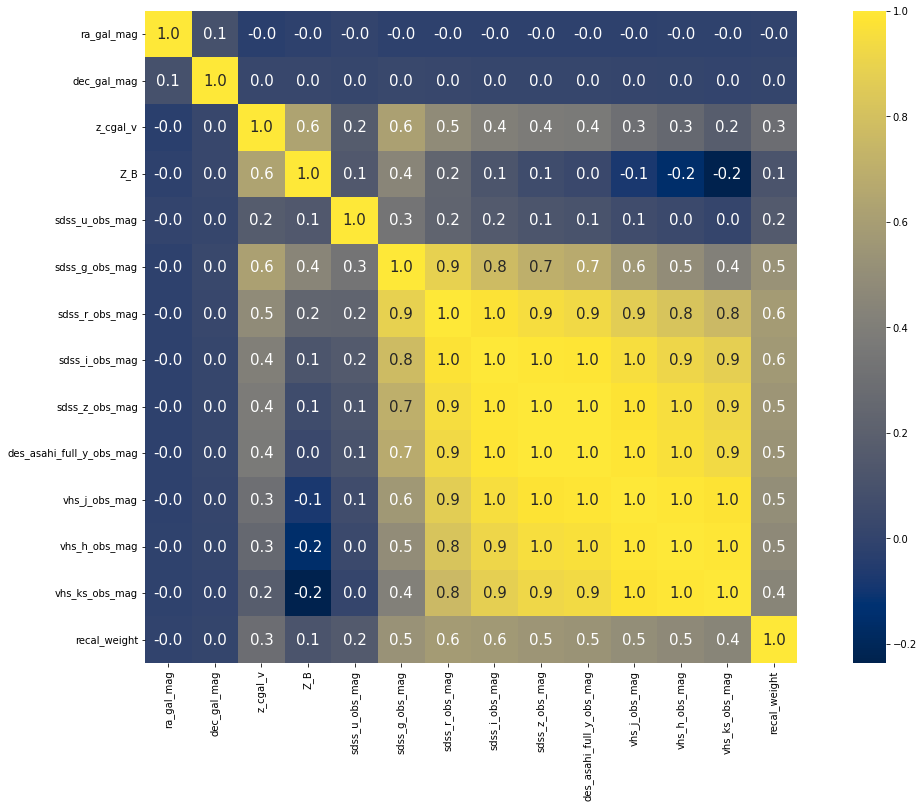

In [192]:
#Kaggle
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='cividis')
plt.show()

## DATA VISUALIZATION

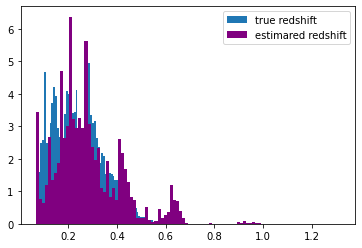

In [311]:
x= df['z_cgal_v']
plt.hist(x, label= 'true redshift', density=True, bins = 100)
y= df['Z_B']
plt.hist(y, label='estimared redshift', color='purple', density=True, bins = 100)
plt.legend()
plt.show()

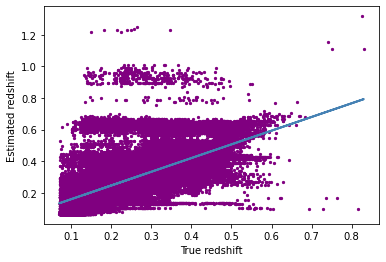

In [316]:
x= df['z_cgal_v']
y= df['Z_B']
m, b = np.polyfit(x, y, 1) # where m= slope, b= intercept
plt.scatter(x,y, c='purple', s=5)
plt.plot(x, m*x+b, color='steelblue', linestyle='-', linewidth=2)
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

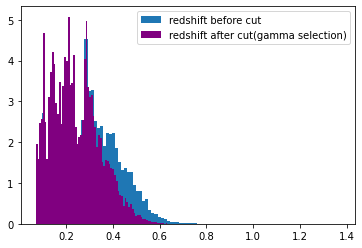

In [323]:
x=df1['z_cgal_v']
plt.hist(x, label= 'redshift before cut', density=True, bins = 100)
y= df['z_cgal_v']
plt.hist(y, label='redshift after cut(gamma selection)', density=True, color='purple', bins = 100)
plt.legend()
plt.show()

## DATA PREPROCESSING

In [7]:
#here I split the data using iloc into x and y for training and testing
x=df.drop(columns=['z_cgal_v'])
y=df['z_cgal_v']

#### SCALING THE DATA

Standardization and normalization are two ways to rescale data.

Standardization rescales a dataset to have a mean of 0 and a standard deviation of 1

Normalization rescales a dataset so that each value falls between 0 and 1.

In [342]:
## Sandardization of data ###
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
# Storing the fit object for later reference
x= scaler.fit_transform(x)
y=y.values.reshape(-1,1)
y= scaler.fit_transform(y)

print(x.shape)
print(y.shape)

(96063, 13)
(96063, 1)


### TRAIN TEST SPLIT

In [326]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76850, 13)
(76850, 1)
(19213, 13)
(19213, 1)


## Multiple Linear Regression

In [327]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # making the model an instance of sklearn.tree
lr.fit(X_train,y_train)
#Using the model to predict X_test
lr_pred = lr.predict(X_test)

Using RFE

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

Now, we have 13 predictor features. To build the model using RFE, we need to tell RFE how many features we want in the final model. It then runs a feature elimination algorithm.

Note that the number of features to be used in the model is a hyperparameter.

In [198]:
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [199]:
# prediction of X_test
rfe_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, rfe_pred)
print(r2)

0.7776282363642851


In [8]:
# Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
import math

In [201]:
MAE= mean_absolute_error(y_test, lr_pred)
MAE

0.33604368848820415

In [202]:
MSE= mean_squared_error(y_test, lr_pred)
MSE

0.22108020762303204

In [203]:
RMSE= math.sqrt(MSE)
RMSE

0.4701916711544687

In [9]:
def MAPE(Y_actual,Y_Predicted):
  Y_actual, Y_Predicted = np.array(Y_actual), np.array(Y_Predicted)
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

In [205]:
MAPE(y_test, lr_pred)

195.56418694286083

In [328]:
# R2 can also be used to evaluate accuracy
R2= r2_score(y_test, lr_pred)
R2

0.778068031195198

In [207]:
accuracy= abs(100-MAPE(y_test, lr_pred))
print('The accuracy of linear regression model is :', accuracy)

The accuracy of linear regression model is : 95.56418694286083


K-FOLD CROSS VALIDATION

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

What is the purpose of k-fold cross-validation?

K-Folds cross validation is one method that attempts to maximize the use of the available data for training and then testing a model. It is particularly useful for assessing model performance, as it provides a range of accuracy scores across (somewhat) different data sets.

In [132]:
# using k-fold CV on all the 13 variables
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())  

[0.78397109 0.78212475 0.77758427 0.78218473 0.78081415 0.7764892
 0.77288283 0.76926516 0.78834134 0.78485443]
Mean: 0.7798511952126546
Standard Deviation: 0.0055017669801163


In [208]:
# Getting the difference in mean between the test data and the predicted data
abs(np.mean(y_test)-np.mean(lr_pred))

0.0003157409014845412

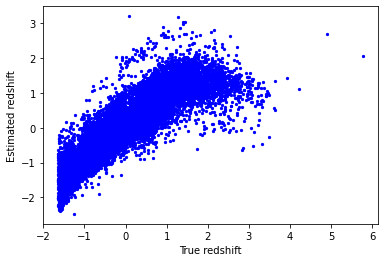

In [329]:
# Making a scatter plot of the prediction data against the test data
plt.scatter(y_test, lr_pred, color="blue", s=5)
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

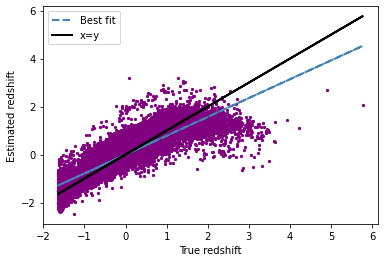

In [330]:
a=y_test[:,0]
b=lr_pred
m, c = np.polyfit(a, b, 1) # where m= slope, c= intercept
plt.scatter(a,b, c='purple', s=5)
plt.plot(a, m*a+c, color='steelblue', linestyle='--', linewidth=2, label='Best fit')
plt.plot(a, a, color='black', linestyle='-', linewidth=2, label='x=y')
plt.legend()
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

## KNN

In [343]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72047, 13)
(72047, 1)
(24016, 13)
(24016, 1)


In [344]:
#Creating the model on Training Data
KNN.fit(X_train,y_train)
knn_pred=KNN.predict(X_test)

In [345]:
R2= r2_score(y_test, knn_pred)
R2

0.7654655995982307

In [231]:
MAE= mean_absolute_error(y_test, knn_pred)
MAE

0.3441739065527249

In [232]:
MSE= mean_squared_error(y_test, knn_pred)
MSE

0.2336457648001601

In [229]:
MAPE(y_test, knn_pred)

231.40385034772572

In [230]:
accuracy= abs(100-MAPE(y_test, knn_pred))
print('accuracy of the knn model is :',accuracy)

accuracy of the knn model is : 131.40385034772572


In [233]:
# using k-fold CV on all the 13 variables
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(KNN, X_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())  

[0.74947111 0.76678741 0.76606908 0.76118168 0.76855159 0.74896293
 0.75804562 0.76126795 0.7638645  0.75888868]
Mean: 0.7603090551581021
Standard Deviation: 0.0064089376820936975


In [234]:
# Getting the difference in mean between the test data and the predicted data
abs(np.mean(y_test)-np.mean(knn_pred))

0.016087089495256446

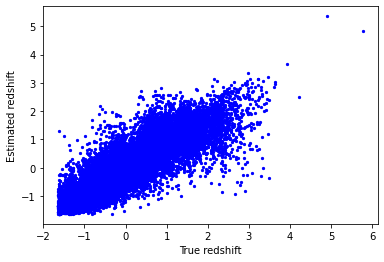

In [346]:
# Making a scatter plot of the prediction data against the test data
plt.scatter(y_test, knn_pred, color="blue", s=5)
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

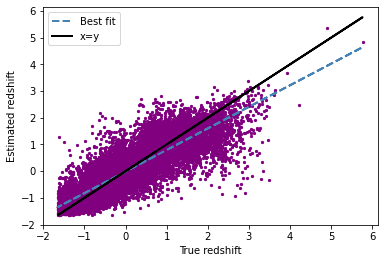

In [237]:
# Fitting a line of best fit to the above figure
a=y_test[:,0]
b=knn_pred
m, c = np.polyfit(a, b, 1) # where m= slope, c= intercept
plt.scatter(a,b, c='purple', s=5)
plt.plot(a, m*a+c, color='steelblue', linestyle='--', linewidth=2, label='Best fit')
plt.plot(a, a, color='black', linestyle='-', linewidth=2, label='x=y')
plt.legend()
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

### Using Gridsearch CV

In [347]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
knn = model.best_estimator_
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [348]:
# Prediction on test data
grid_pred = knn.predict(X_test)

In [349]:
R2= r2_score(y_test, grid_pred)
R2

0.7975306709463534

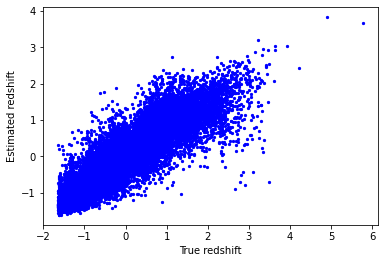

In [350]:
# Making a scatter plot of the grid prediction data against the test data
plt.scatter(y_test, grid_pred, color="blue", s=5)
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

## Support Vector Machines

In [351]:
#here I split the data using iloc into x and y for training
x=df.drop(columns=['z_cgal_v'])
y=df['z_cgal_v']
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [352]:
### Normalization of the data
from sklearn.preprocessing import MinMaxScaler
# normalizing the data between 0 & 1
sc= MinMaxScaler(feature_range=(0,1))
 
# Storing the fit object for later reference
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)
y_train= y_train.values.reshape(-1,1)
y_train= sc.fit_transform(y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(67244, 13)
(67244, 1)
(28819, 13)
(28819,)


In [353]:
svr= SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr_pred= svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)
svr_pred= sc.inverse_transform(svr_pred)
R2= r2_score(y_test, svr_pred)
R2

c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8329249916769814

In [38]:
mape= MAPE(y_test, svr_pred)
mape

59.243863673384155

In [39]:
accuracy= abs(100-mape)
print('Accuracy of the SVM model is :',accuracy)

Accuracy of the SVM model is : 40.756136326615845


In [248]:
MAE= mean_absolute_error(y_test, svr_pred)
MAE

0.03198485338003181

In [249]:
MSE= mean_squared_error(y_test, svr_pred)
MSE

0.0017444076719156014

In [250]:
# using k-fold CV on all the 13 variables
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(svr, X_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())  

c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[0.83335824 0.83489145 0.83270199 0.83079792 0.84035816 0.83405725
 0.84257502 0.83925815 0.83974529 0.84324786]
Mean: 0.8370991314212931
Standard Deviation: 0.004209967626926317


In [251]:
# Getting the difference in mean between the test data and the predicted data
abs(np.mean(y_test)-np.mean(svr_pred))

0.0028635053210421257

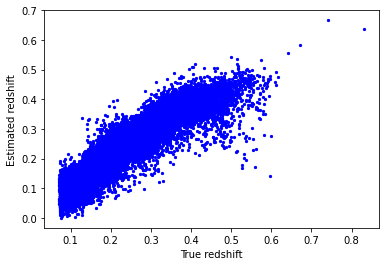

In [252]:
# Making a scatter plot of the prediction data against the test data
plt.scatter(y_test, svr_pred, color="blue", s=5)
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

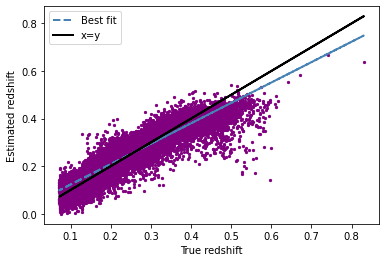

In [261]:
# Fitting a line of best fit to the above figure
a=y_test
b=svr_pred
m, c = np.polyfit(a, b, 1) # where m= slope, c= intercept
plt.scatter(a,b, c='purple', s=5)
plt.plot(a, m*a+c, color='steelblue', linestyle='--', linewidth=2, label='Best fit')
plt.plot(a, a, color='black', linestyle='-', linewidth=2, label='x=y')
plt.legend()
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

Hyperpaeameter Optimization Using Grid Search

In [357]:
parameter_space= {'kernel':['rbf', 'linear'],
                  'gamma':[1, 0.1, 0.01]}

grid_obj= GridSearchCV(SVR(), parameter_space, refit= True, verbose=2, scoring='r2')

In [355]:
grid_obj.fit(X_train,y_train)
svr=grid_obj.best_estimator_
svr.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................................gamma=1, kernel=rbf; total time=  15.9s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................................gamma=1, kernel=rbf; total time=  13.3s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................................gamma=1, kernel=rbf; total time=  13.1s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................................gamma=1, kernel=rbf; total time=  12.6s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................................gamma=1, kernel=rbf; total time=  13.5s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=1, kernel=linear; total time=  23.3s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=1, kernel=linear; total time=  17.9s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=1, kernel=linear; total time=  17.7s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=1, kernel=linear; total time=  17.6s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=1, kernel=linear; total time=  19.2s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............................gamma=0.1, kernel=rbf; total time=  18.7s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............................gamma=0.1, kernel=rbf; total time=  21.6s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............................gamma=0.1, kernel=rbf; total time=  21.5s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............................gamma=0.1, kernel=rbf; total time=  19.4s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............................gamma=0.1, kernel=rbf; total time=  22.6s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................gamma=0.1, kernel=linear; total time=  21.1s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................gamma=0.1, kernel=linear; total time=  19.4s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................gamma=0.1, kernel=linear; total time=  17.0s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................gamma=0.1, kernel=linear; total time=  17.2s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................gamma=0.1, kernel=linear; total time=  17.9s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=0.01, kernel=rbf; total time= 3.6min
[CV] END .............................gamma=0.01, kernel=rbf; total time=  34.0s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=0.01, kernel=rbf; total time=  33.9s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=0.01, kernel=rbf; total time=  33.8s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............................gamma=0.01, kernel=rbf; total time=  33.9s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................gamma=0.01, kernel=linear; total time=  17.0s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................gamma=0.01, kernel=linear; total time=  17.7s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................gamma=0.01, kernel=linear; total time=  16.8s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................gamma=0.01, kernel=linear; total time=  17.0s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................gamma=0.01, kernel=linear; total time=  18.0s


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=1)

In [363]:
 # Prediction on test data
grid_pred = svr.predict(X_test)

In [364]:
R2= r2_score(y_test, grid_pred)
R2

0.7054130445271142

## Random Forest

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor
#here I split the data using iloc into x and y for training
x=df.drop(columns=['z_cgal_v'])
y=df['z_cgal_v']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

#Create a Gaussian regressor
rf=RandomForestRegressor(n_estimators=100, max_depth= 20)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
R2= r2_score(y_test, rf_pred)
print('Accuracy of random forest model is : ', R2)


Accuracy of random forest model is :  0.9363720692889876


In [267]:
MAE= mean_absolute_error(y_test, rf_pred)
MAE

0.017652914784788868

In [269]:
MSE= mean_squared_error(y_test, rf_pred)
MSE

0.0006760524097973779

In [270]:
MAPE(y_test, rf_pred)

8.366117842869656

In [271]:
accuracy= abs(100-MAPE(y_test, rf_pred))
print('The accuracy of the random forest model is :', accuracy)

The accuracy of the random forest model is : 91.63388215713034


In [140]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())  

[0.92390922 0.93492142 0.93333839 0.93388732 0.92910057 0.93777598
 0.93649561 0.93289138 0.93592754 0.93133762]
Mean: 0.9329585047669205
Standard Deviation: 0.003857452646341012


In [266]:
# Getting the difference in mean between the test data and the predicted data
abs(np.mean(y_test)-np.mean(rf_pred))

0.00013708355908889636

In [11]:
# Mean redshift
np.mean(y_test)

0.2393759436482876

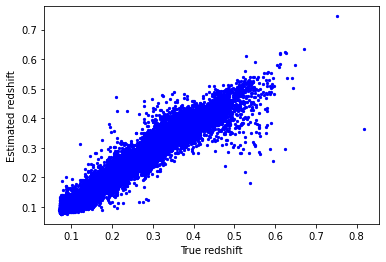

In [272]:
# Making a scatter plot of the prediction data against the test data
plt.scatter(y_test, rf_pred, color="blue", s=5)
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

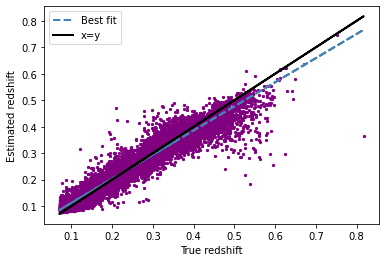

In [273]:
# Fitting a line of best fit to the above figure
a=y_test
b=rf_pred
m, c = np.polyfit(a, b, 1) # where m= slope, c= intercept
plt.scatter(a,b, c='purple', s=5)
plt.plot(a, m*a+c, color='steelblue', linestyle='--', linewidth=2, label='Best fit')
plt.plot(a, a, color='black', linestyle='-', linewidth=2, label='x=y')
plt.legend()
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

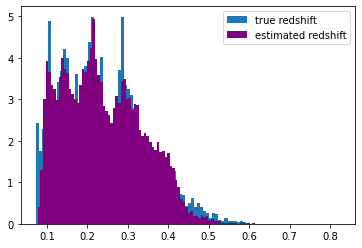

In [297]:
# Making a plot of the true redshift against our predicted redshift from the random forest model
plt.hist(y_test, label= 'true redshift', density=True, bins = 100)
plt.hist(rf_pred, label='estimated redshift', color='Purple', density=True, bins = 100)
plt.legend()
plt.show()

In [134]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### HYPERPARAMETER OPTIMIZATION USING RANDOM SEARCH

In [150]:
# TOWARDS DATASCIENCE
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [151]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). 

More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. 

Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [152]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "c:\

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [153]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [159]:
#To determine if random search yielded a better model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [160]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0173 degrees.
Accuracy = 91.79%.


### HYPERPARAMETER OPTIMIZATION USING GRID SEARCH

In [47]:
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [2, 3, 5, 10],
    'max_features': ['log2', 'sqrt','auto'], 
    'min_samples_leaf': [1, 5, 8],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [4, 6, 9, 10, 15]
}

# Instantiate the grid search model
grid_obj = GridSearchCV(rf, parameters, cv = 3, n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Envy\Desktop\Thesis\.venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=5,
                      min_samples_split=3, n_estimators=15)

In [48]:
# Prediction on test data
grid_pred = rf.predict(X_test)

In [49]:
# Calculating the accuracy
grid_acc= r2_score(y_test, grid_pred)
print( 'Accuracy of Random Forest model : ', grid_acc )

Accuracy of Random Forest model :  0.8623992745929313


## Neural Networks

In [450]:
#Separate Dependent Variable and Independent Variables
TargetVariable=['z_cgal_v']
Predictors=['ra_gal_mag', 'dec_gal_mag', 'Z_B', 'sdss_u_obs_mag', 'sdss_g_obs_mag', 'sdss_r_obs_mag', 'sdss_i_obs_mag', 'sdss_z_obs_mag', 'des_asahi_full_y_obs_mag', 'vhs_j_obs_mag', 'vhs_h_obs_mag', 'vhs_ks_obs_mag', 'recal_weight']
 
x= df[Predictors].values
y= df[TargetVariable].values

In [451]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(x)
y=TargetVarScalerFit.transform(y)

print(x.shape)
print(y.shape)

(96063, 13)
(96063, 1)


In [452]:
# importing the libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
ann = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
ann.add(Dense(units=100, input_dim=13, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
ann.add(Dense(units=50, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
ann.add(Dense(1, kernel_initializer='normal', activation='linear'))
 
# Compiling the model
ann.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
ann.fit(X_train, y_train ,batch_size = 32, epochs = 10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
2102/2102 [==============================] - 19s 4ms/step - loss: 0.6422 - val_loss: 0.3893
Epoch 2/10
2102/2102 [==============================] - 8s 4ms/step - loss: 0.3826 - val_loss: 0.3614
Epoch 3/10
2102/2102 [==============================] - 8s 4ms/step - loss: 0.3503 - val_loss: 0.3201
Epoch 4/10
2102/2102 [==============================] - 7s 4ms/step - loss: 0.3254 - val_loss: 0.4123
Epoch 5/10
2102/2102 [==============================] - 8s 4ms/step - loss: 0.3112 - val_loss: 0.3089
Epoch 6/10
2102/2102 [==============================] - 8s 4ms/step - loss: 0.3014 - val_loss: 0.3295
Epoch 7/10
2102/2102 [==============================] - 8s 4ms/step - loss: 0.2872 - val_loss: 0.2613
Epoch 8/10
2102/2102 [==============================] - 8s 4ms/step - loss: 0.2698 - val_loss: 0.2355
Epoch 9/10
2102/2102 [==============================] - 7s 4ms/step - loss: 0.2613 - val_loss: 0.2287
Epoch 10/10
2102/2102 [==============================] - 8s 4ms/step - loss: 0.23

In [453]:
ann_pred = ann.predict(X_test)
r2= r2_score(y_test, ann_pred)
r2

901/901 [==============================] - 2s 2ms/step


0.7909624000145371

In [454]:
MAE= mean_absolute_error(y_test, ann_pred)
MAE

0.33328433996721935

In [455]:
MSE= mean_squared_error(y_test, ann_pred)
MSE

0.2082687053596623

In [460]:
# Getting the difference in mean between the test data and the predicted data
abs(np.mean(y_test)-np.mean(ann_pred))

0.08539636244759054

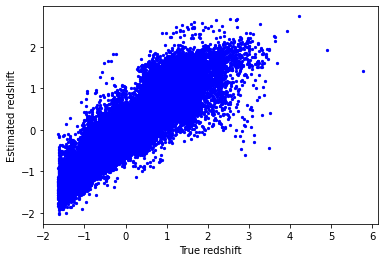

In [456]:
# Making a scatter plot of the prediction data against the test data
plt.scatter(y_test, ann_pred, color="blue", s=5)
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

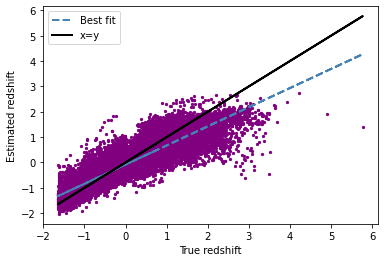

In [462]:
# Fitting a line of best fit to the above figure
a=y_test[:,0]
b=ann_pred
m, c = np.polyfit(a, b, 1) # where m= slope, c= intercept
plt.scatter(a,b, c='purple', s=5)
plt.plot(a, m*a+c, color='steelblue', linestyle='--', linewidth=2, label='Best fit')
plt.plot(a, a, color='black', linestyle='-', linewidth=2, label='x=y')
plt.legend()
plt.xlabel ('True redshift')
plt.ylabel ('Estimated redshift')
plt.show()

## Finding best set of parameters For using manual grid search

In [64]:
#Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

901/901 [==============================] - 1s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 106.21923475550756


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 2s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 106.69727357173866


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 2s 2ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 104.4534065450525


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 2s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 99.34480833324918


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 1s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 99.33355118573073


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 2s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 99.8532155079644


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 2s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 105.73340982128413


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 2s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 112.61743978360572


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 1s 2ms/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 111.8029447936976


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 2s 2ms/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 111.75824711134092


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 2s 2ms/step
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 117.37786458755997


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 1s 1ms/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 100.15971774267328


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 1s 1ms/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 99.34486391225619


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 1s 1ms/step
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 93.62124609043707


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 1s 1ms/step
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 96.59702560616748


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


901/901 [==============================] - 1s 1ms/step
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 95.87370463976339


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\2243503888.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<AxesSubplot:xlabel='Parameters'>

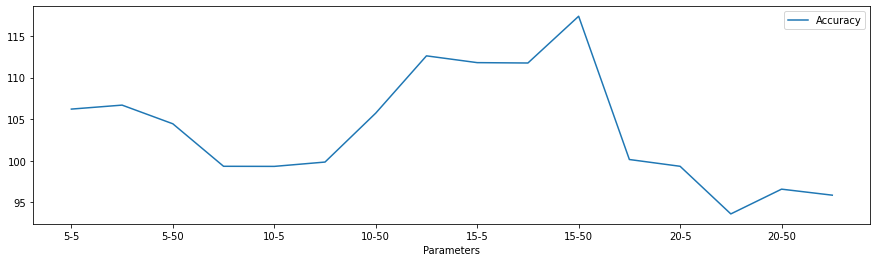

In [66]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

## Hyperparameter Tuning
Using the best set of parameters found above, training the model again and predicting the prices on testing data.

In [69]:
# Fitting the ANN to the Training set
ann.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)
 
# Generating Predictions on testing data
Predictions=ann.predict(X_test)
 
# Scaling the predicted redshift data back to original scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test data back to original scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['redshift']=y_test_orig
TestingData['Estimated_redshift']=Predictions
TestingData.head()

901/901 [==============================] - 2s 2ms/step


,ra_gal_mag,dec_gal_mag,Z_B,sdss_u_obs_mag,sdss_g_obs_mag,sdss_r_obs_mag,sdss_i_obs_mag,sdss_z_obs_mag,des_asahi_full_y_obs_mag,vhs_j_obs_mag,vhs_h_obs_mag,vhs_ks_obs_mag,recal_weight,redshift,Estimated_redshift
0,-0.409266,1.510878,0.680258,-0.144829,0.400605,0.831855,1.109315,1.171359,1.179694,1.226186,1.243443,1.249292,-0.747927,0.737803,0.613950
1,1.092592,-0.873017,-0.957552,-0.633045,-2.762294,-3.066216,-2.955059,-2.883524,-2.854321,-2.560592,-2.384948,-2.117079,-0.747927,-1.445768,-1.451690
2,-0.126420,-1.222649,2.460487,0.178702,0.925055,0.468166,0.164743,-0.079234,-0.227018,-0.438707,-0.605941,-0.830714,-0.747927,1.015622,0.896152
3,-1.650511,-0.289822,-0.459088,0.432893,0.924930,0.540011,0.331217,0.285436,0.241754,0.192734,0.232840,0.179792,1.337964,0.248495,0.179823
4,1.119447,-0.124121,-0.316670,0.373321,0.569977,-0.044658,-0.234959,-0.286784,-0.259177,-0.292735,-0.232599,-0.306290,-0.747927,0.926825,0.892685


## Finding the accuracy of the model
Using the final trained model, now we are generating the prediction error for each row in testing data as the Absolute Percentage Error. Taking the average for all the rows is known as Mean Absolute Percentage Error(MAPE).

The accuracy is calculated as 100-MAPE.

In [73]:
# Computing the absolute percentage error
APE=100*(abs(TestingData['redshift']-TestingData['Estimated_redshift'])/TestingData['redshift'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 104.37947909295069


,ra_gal_mag,dec_gal_mag,Z_B,sdss_u_obs_mag,sdss_g_obs_mag,sdss_r_obs_mag,sdss_i_obs_mag,sdss_z_obs_mag,des_asahi_full_y_obs_mag,vhs_j_obs_mag,vhs_h_obs_mag,vhs_ks_obs_mag,recal_weight,redshift,Estimated_redshift,APE
0,-0.409266,1.510878,0.680258,-0.144829,0.400605,0.831855,1.109315,1.171359,1.179694,1.226186,1.243443,1.249292,-0.747927,0.737803,0.613950,16.786730
1,1.092592,-0.873017,-0.957552,-0.633045,-2.762294,-3.066216,-2.955059,-2.883524,-2.854321,-2.560592,-2.384948,-2.117079,-0.747927,-1.445768,-1.451690,-0.409593
2,-0.126420,-1.222649,2.460487,0.178702,0.925055,0.468166,0.164743,-0.079234,-0.227018,-0.438707,-0.605941,-0.830714,-0.747927,1.015622,0.896152,11.763190
3,-1.650511,-0.289822,-0.459088,0.432893,0.924930,0.540011,0.331217,0.285436,0.241754,0.192734,0.232840,0.179792,1.337964,0.248495,0.179823,27.635281
4,1.119447,-0.124121,-0.316670,0.373321,0.569977,-0.044658,-0.234959,-0.286784,-0.259177,-0.292735,-0.232599,-0.306290,-0.747927,0.926825,0.892685,3.683509


## Why the accuracy comes different every time I train ANN?
Even when you use the same hyperparameters, the result will be slightly different for each run of ANN. This happens because the initial step for ANN is the random initialization of weights. So every time you run the code, there are different values that get assigned to each neuron as weights and bias, hence the final outcome also differs slightly.

## Finding best hyperparameters using GridSearchCV.
Apart from the manual search method shown above, you can also use the Grid Search Cross-validation method present in the sklearn library to find the best parameters of ANN.

The below snippet defines some parameter values to try and finds the best combination out of it.

In [76]:
 #Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model
 
###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)
 
###########################################
from sklearn.metrics import make_scorer
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)
 
#########################################
 
# Running Grid Search for different paramenters
grid_search.fit(X_train,y_train, verbose=1)
 
print('Printing Best parameters')
grid_search.best_params_

Epoch 1/10


C:\Users\Envy\AppData\Local\Temp\ipykernel_4864\3752114377.py:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModel=KerasRegressor(make_regression_ann, verbose=0)


7685/7685 [==============================] - 18s 2ms/step - loss: 0.3014
Epoch 2/10
7685/7685 [==============================] - 14s 2ms/step - loss: 0.1255
Epoch 3/10
7685/7685 [==============================] - 14s 2ms/step - loss: 0.0938
Epoch 4/10
7685/7685 [==============================] - 14s 2ms/step - loss: 0.0838
Epoch 5/10
7685/7685 [==============================] - 14s 2ms/step - loss: 0.0802
Epoch 6/10
7685/7685 [==============================] - 14s 2ms/step - loss: 0.0785
Epoch 7/10
7685/7685 [==============================] - 14s 2ms/step - loss: 0.0772
Epoch 8/10
7685/7685 [==============================] - 13s 2ms/step - loss: 0.0758
Epoch 9/10
7685/7685 [==============================] - 17s 2ms/step - loss: 0.0747
Epoch 10/10
7685/7685 [==============================] - 15s 2ms/step - loss: 0.0739
###################################################################### Accuracy: 595.2351592300433
Epoch 1/10
7685/7685 [==============================] - 17s 2ms/step - 

{'Optimizer_trial': 'rmsprop', 'batch_size': 30, 'epochs': 10}